<a href="https://colab.research.google.com/github/EdioHub/Walmart-K-means-e-Prophet-agrupamento-e-previs-o-de-vendas/blob/main/Github__Walmart_agrupamento_e_previs%C3%A3o_de_vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Análise de Vendas, Segmentação de Clientes e Previsão de Vendas

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
datawal = pd.read_csv('/content/drive/MyDrive/Projetos git/05-Walmart /walmart dataset/Walmart.csv')

In [71]:
# datawal= pd.read_csv("/content/Walmart.csv")
# datawal

In [72]:
datawal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       3203 non-null   object 
 1   Order Date     3203 non-null   object 
 2   Ship Date      3203 non-null   object 
 3   Customer Name  3203 non-null   object 
 4   Country        3203 non-null   object 
 5   City           3203 non-null   object 
 6   State          3203 non-null   object 
 7   Category       3203 non-null   object 
 8   Product Name   3203 non-null   object 
 9   Sales          3203 non-null   float64
 10  Quantity       3203 non-null   float64
 11  Profit         3203 non-null   float64
dtypes: float64(3), object(9)
memory usage: 300.4+ KB


In [73]:
datawal.columns.tolist()

['Order ID',
 'Order Date',
 'Ship Date',
 'Customer Name',
 'Country',
 'City',
 'State',
 'Category',
 'Product Name',
 'Sales',
 'Quantity',
 'Profit']

In [74]:
datawal.rename(columns={'Order ID':'Pedido',
 'Order Date':'dia_venda',
 'Ship Date': 'dia_envio',
 'Customer Name':'nome_cliente',
 'Country':'país',
 'City':'cidade',
 'State': 'estado',
 'Category':'categoria',
 'Product Name': 'produto',
 'Sales' : 'valor',
 'Quantity':'qtde',
 'Profit': 'lucro'}, inplace = True)

In [75]:
datawal.head()

,Pedido,dia_venda,dia_envio,nome_cliente,país,cidade,estado,categoria,produto,valor,qtde,lucro
0,CA-2013-138688,13-06-2013,17-06-2013,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
2,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97
3,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72
4,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78


In [76]:
removedata=datawal.loc[(datawal ['lucro'] < 0) ]
removedata

,Pedido,dia_venda,dia_envio,nome_cliente,país,cidade,estado,categoria,produto,valor,qtde,lucro
28,US-2014-109484,07-11-2014,13-11-2014,Roger Barcio,United States,Portland,Oregon,Binders,Flexible Leather- Look Classic Collection Ring...,5.68,1.0,-3.79
30,US-2012-156867,13-11-2012,17-11-2012,Lena Cacioppo,United States,Aurora,Colorado,Accessories,Logitech K350 2.4Ghz Wireless Keyboard,238.90,6.0,-26.88
31,US-2012-156867,13-11-2012,17-11-2012,Lena Cacioppo,United States,Aurora,Colorado,Furnishings,"Deflect-o DuraMat Lighweight, Studded, Beveled...",102.36,3.0,-3.84
32,US-2012-156867,13-11-2012,17-11-2012,Lena Cacioppo,United States,Aurora,Colorado,Binders,"Avery Trapezoid Ring Binder, 3"" Capacity, Blac...",36.88,3.0,-25.82
34,US-2014-107272,06-11-2014,13-11-2014,Troy Staebel,United States,Phoenix,Arizona,Binders,"Avery Durable Slant Ring Binders, No Labels",2.39,2.0,-1.83
...,...,...,...,...,...,...,...,...,...,...,...,...
3132,CA-2014-137505,25-11-2014,25-11-2014,Beth Paige,United States,Los Angeles,California,Tables,Hon 61000 Series Interactive Training Tables,71.09,2.0,-1.78
3147,US-2011-164406,15-08-2011,19-08-2011,Brian Dahlen,United States,San Francisco,California,Chairs,Novimex Fabric Task Chair,195.14,4.0,-12.20
3174,CA-2012-132388,10-10-2012,12-10-2012,Katherine Nockton,United States,Santa Barbara,California,Chairs,"Global Leather & Oak Executive Chair, Burgundy",362.14,3.0,-54.32
3179,CA-2012-104948,13-11-2012,17-11-2012,Keith Herrera,United States,San Bernardino,California,Bookcases,O'Sullivan Living Dimensions 3-Shelf Bookcases,683.33,4.0,-40.20


In [77]:
removedata=datawal.loc[(datawal ['valor'] < 0) ]
removedata

,Pedido,dia_venda,dia_envio,nome_cliente,país,cidade,estado,categoria,produto,valor,qtde,lucro


In [78]:
datawal.describe()

,valor,qtde,lucro
count,3203.000000,3203.000000,3203.000000
mean,226.493266,3.828910,33.849138
std,524.876911,2.260947,174.109155
min,0.990000,1.000000,-3399.980000
25%,19.440000,2.000000,3.850000
50%,60.840000,3.000000,11.170000
75%,215.810000,5.000000,33.000000
max,13999.960000,14.000000,6719.980000


In [79]:
datawal['cidade'].unique()

array(['Los Angeles', 'Seattle', 'West Jordan', 'San Francisco', 'Orem',
       'Gilbert', 'Portland', 'Aurora', 'Phoenix', 'Roseville',
       'Pasadena', 'Scottsdale', 'San Jose', 'Carlsbad', 'Redlands',
       'Denver', 'Whittier', 'Santa Clara', 'San Diego', 'Brentwood',
       'Inglewood', 'Colorado Springs', 'Arvada', 'Long Beach',
       'Hesperia', 'Layton', 'Tucson', 'Des Moines', 'Las Vegas',
       'Huntington Beach', 'Louisville', 'Concord', 'Costa Mesa',
       'Parker', 'Great Falls', 'Mesa', 'Anaheim', 'Marysville', 'Salem',
       'Vallejo', 'Mission Viejo', 'Sierra Vista', 'Vancouver',
       'Lancaster', 'Lake Elsinore', 'Edmonds', 'Santa Ana', 'Salinas',
       'Farmington', 'Riverside', 'Torrance', 'Oceanside', 'Murrieta',
       'Olympia', 'Oakland', 'Encinitas', 'Antioch', 'Reno', 'Escondido',
       'Fresno', 'Pueblo', 'Fairfield', 'Pico Rivera', 'Provo',
       'Pleasant Grove', 'Glendale', 'Westminster', 'Pomona',
       'North Las Vegas', 'Tempe', 'Laguna Nigu

In [80]:
datawal['estado'].unique()

array(['California', 'Washington', 'Utah', 'Arizona', 'Oregon',
       'Colorado', 'New Mexico', 'Nevada', 'Montana', 'Idaho', 'Wyoming'],
      dtype=object)

In [81]:
datawal['categoria'].unique()

array(['Labels', 'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances',
       'Tables', 'Storage', 'Accessories', 'Paper', 'Chairs', 'Fasteners',
       'Supplies', 'Envelopes', 'Copiers', 'Bookcases', 'Machines'],
      dtype=object)

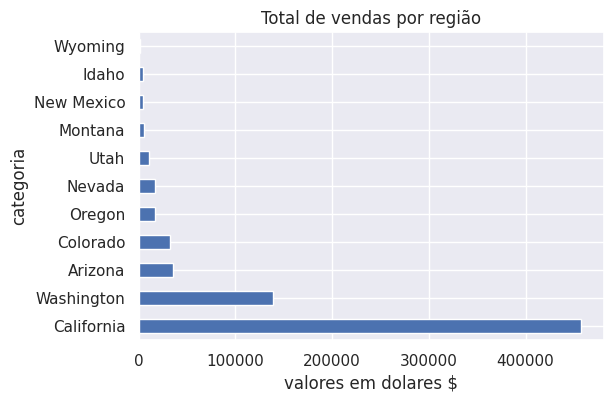

In [82]:
import matplotlib.pyplot as plt
# Group the data by category and sum the sales
venda_regional = datawal.groupby("estado")["valor"].sum()
# Sort the sales by descending order and plot a bar chart
plt.figure(figsize=(6,4))# plotsize sempre o primeiro
venda_regional.sort_values(ascending=False).plot(kind="barh")
plt.title("Total de vendas por região")

plt.xlabel("valores em dolares $")
plt.ylabel("categoria")
plt.show()

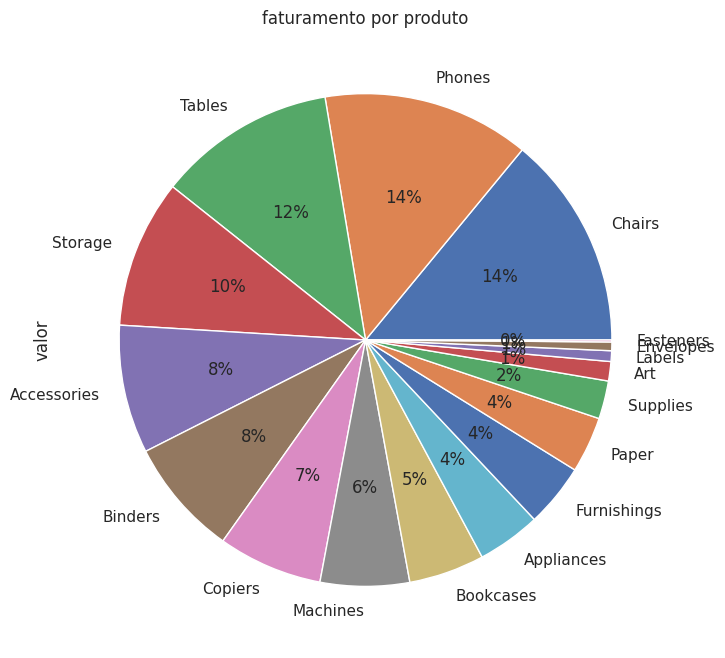

In [83]:
# Group the data by region and sum the sales
produto = datawal.groupby("categoria")["valor"].sum()
plt.figure(figsize=(10,8) )
# Sort the sales by descending order and plot a pie chart
produto.sort_values(ascending=False).plot( kind='pie', y='votes_of_each_class', autopct='%1.0f%%')
plt.title("faturamento por produto")
#plt.ylabel("")
plt.show()

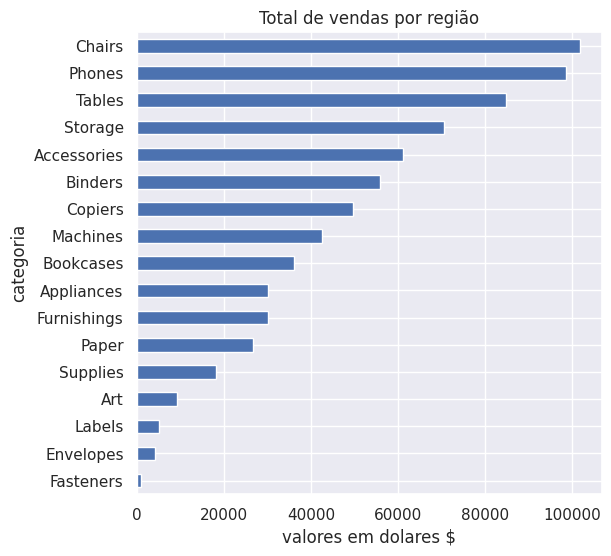

In [86]:
import matplotlib.pyplot as plt
# Group the data by category and sum the sales
produto = datawal.groupby("categoria")["valor"].sum()
# Sort the sales by descending order and plot a bar chart
plt.figure(figsize=(6,6))# plotsize sempre o primeiro
produto.sort_values(ascending=True).plot(kind="barh")
plt.title("Total de vendas por região")

plt.xlabel("valores em dolares $")
plt.ylabel("categoria")
plt.show()

array([[<Axes: title={'center': 'valor'}>,
        <Axes: title={'center': 'qtde'}>],
       [<Axes: title={'center': 'lucro'}>, <Axes: >]], dtype=object)

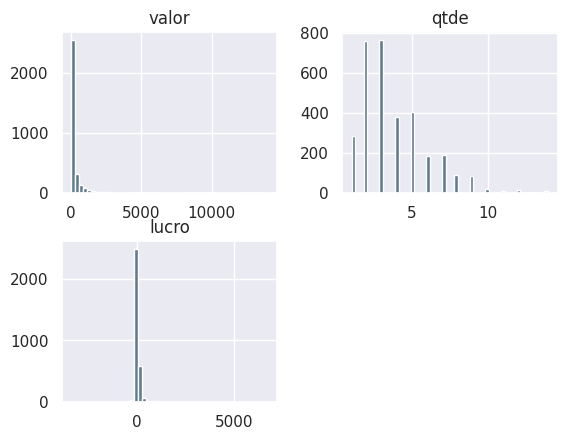

In [87]:
datawal.hist(grid=True, bins=50, rwidth=0.9, color='#607c8e')

organizar as datas

In [88]:
datawal.columns.tolist()

['Pedido',
 'dia_venda',
 'dia_envio',
 'nome_cliente',
 'país',
 'cidade',
 'estado',
 'categoria',
 'produto',
 'valor',
 'qtde',
 'lucro']

In [89]:
datawal

,Pedido,dia_venda,dia_envio,nome_cliente,país,cidade,estado,categoria,produto,valor,qtde,lucro
0,CA-2013-138688,13-06-2013,17-06-2013,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
2,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97
3,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72
4,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78
...,...,...,...,...,...,...,...,...,...,...,...,...
3198,CA-2013-125794,30-09-2013,04-10-2013,Maris LaWare,United States,Los Angeles,California,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.24,1.0,15.22
3199,CA-2014-121258,27-02-2014,04-03-2014,Dave Brooks,United States,Costa Mesa,California,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.96,2.0,15.63
3200,CA-2014-121258,27-02-2014,04-03-2014,Dave Brooks,United States,Costa Mesa,California,Phones,Aastra 57i VoIP phone,258.58,2.0,19.39
3201,CA-2014-121258,27-02-2014,04-03-2014,Dave Brooks,United States,Costa Mesa,California,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.60,4.0,13.32


In [90]:
datawal[['dia_venda', 'dia_envio']]=datawal[['dia_venda', 'dia_envio']].apply(pd.to_datetime)

<ipython-input-90-de5bd653530f>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  datawal[['dia_venda', 'dia_envio']]=datawal[['dia_venda', 'dia_envio']].apply(pd.to_datetime)
<ipython-input-90-de5bd653530f>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  datawal[['dia_venda', 'dia_envio']]=datawal[['dia_venda', 'dia_envio']].apply(pd.to_datetime)


In [91]:
datawal[['dia_venda','dia_envio']]

,dia_venda,dia_envio
0,2013-06-13,2013-06-17
1,2011-09-06,2011-06-14
2,2011-09-06,2011-06-14
3,2011-09-06,2011-06-14
4,2011-09-06,2011-06-14
...,...,...
3198,2013-09-30,2013-04-10
3199,2014-02-27,2014-04-03
3200,2014-02-27,2014-04-03
3201,2014-02-27,2014-04-03


verificação apenas dos float

<Axes: >

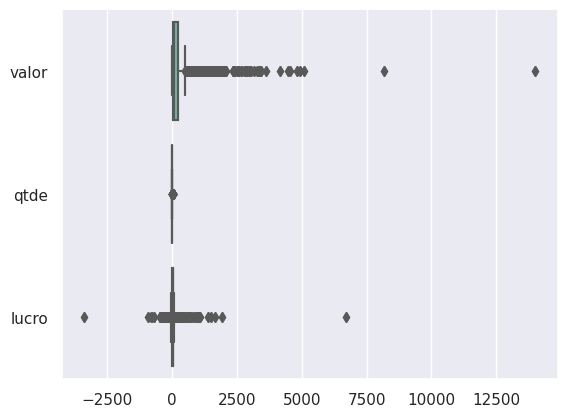

In [92]:
import seaborn as sns
ax = sns.boxplot(data=datawal, orient='h', palette='Set3')
sns.boxplot(data=datawal ,orient='h', palette='Set2')

<Axes: >

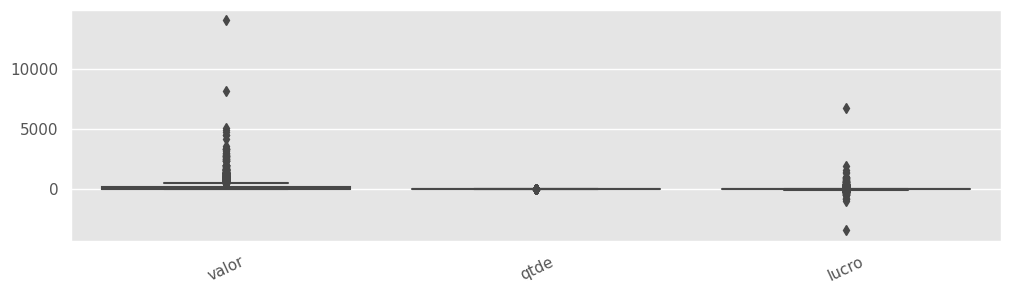

In [93]:
plt.figure(figsize=(12, 3))
plt.style.use('ggplot')
plt.xticks(rotation=25)
sns.boxplot(data=datawal)

# Outliers remoção

In [94]:
datawal=datawal[(datawal['lucro'] < 6400) & (datawal['lucro'] > -1100)]
datawal=datawal[datawal['valor'] < 7500]
# datawal=datawal[datawal['lucro'] > 1100]

# df[(df.line_race != 0) & (df.line_race != 10)]

In [95]:
datawal['lucro']

0        6.87
1       14.17
2        1.97
3       90.72
4        5.78
        ...  
3198    15.22
3199    15.63
3200    19.39
3201    13.32
3202    72.95
Name: lucro, Length: 3200, dtype: float64

<Axes: >

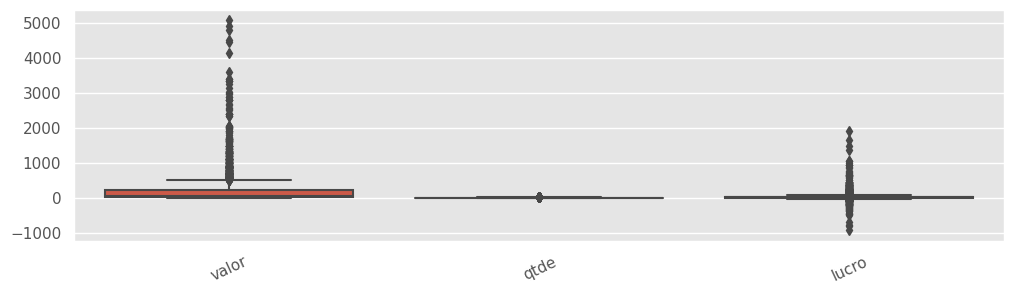

In [96]:
plt.figure(figsize=(12, 3))
plt.style.use('ggplot')
plt.xticks(rotation=25)
sns.boxplot(data=datawal)

Mais plotagens para entendimmento do dataset

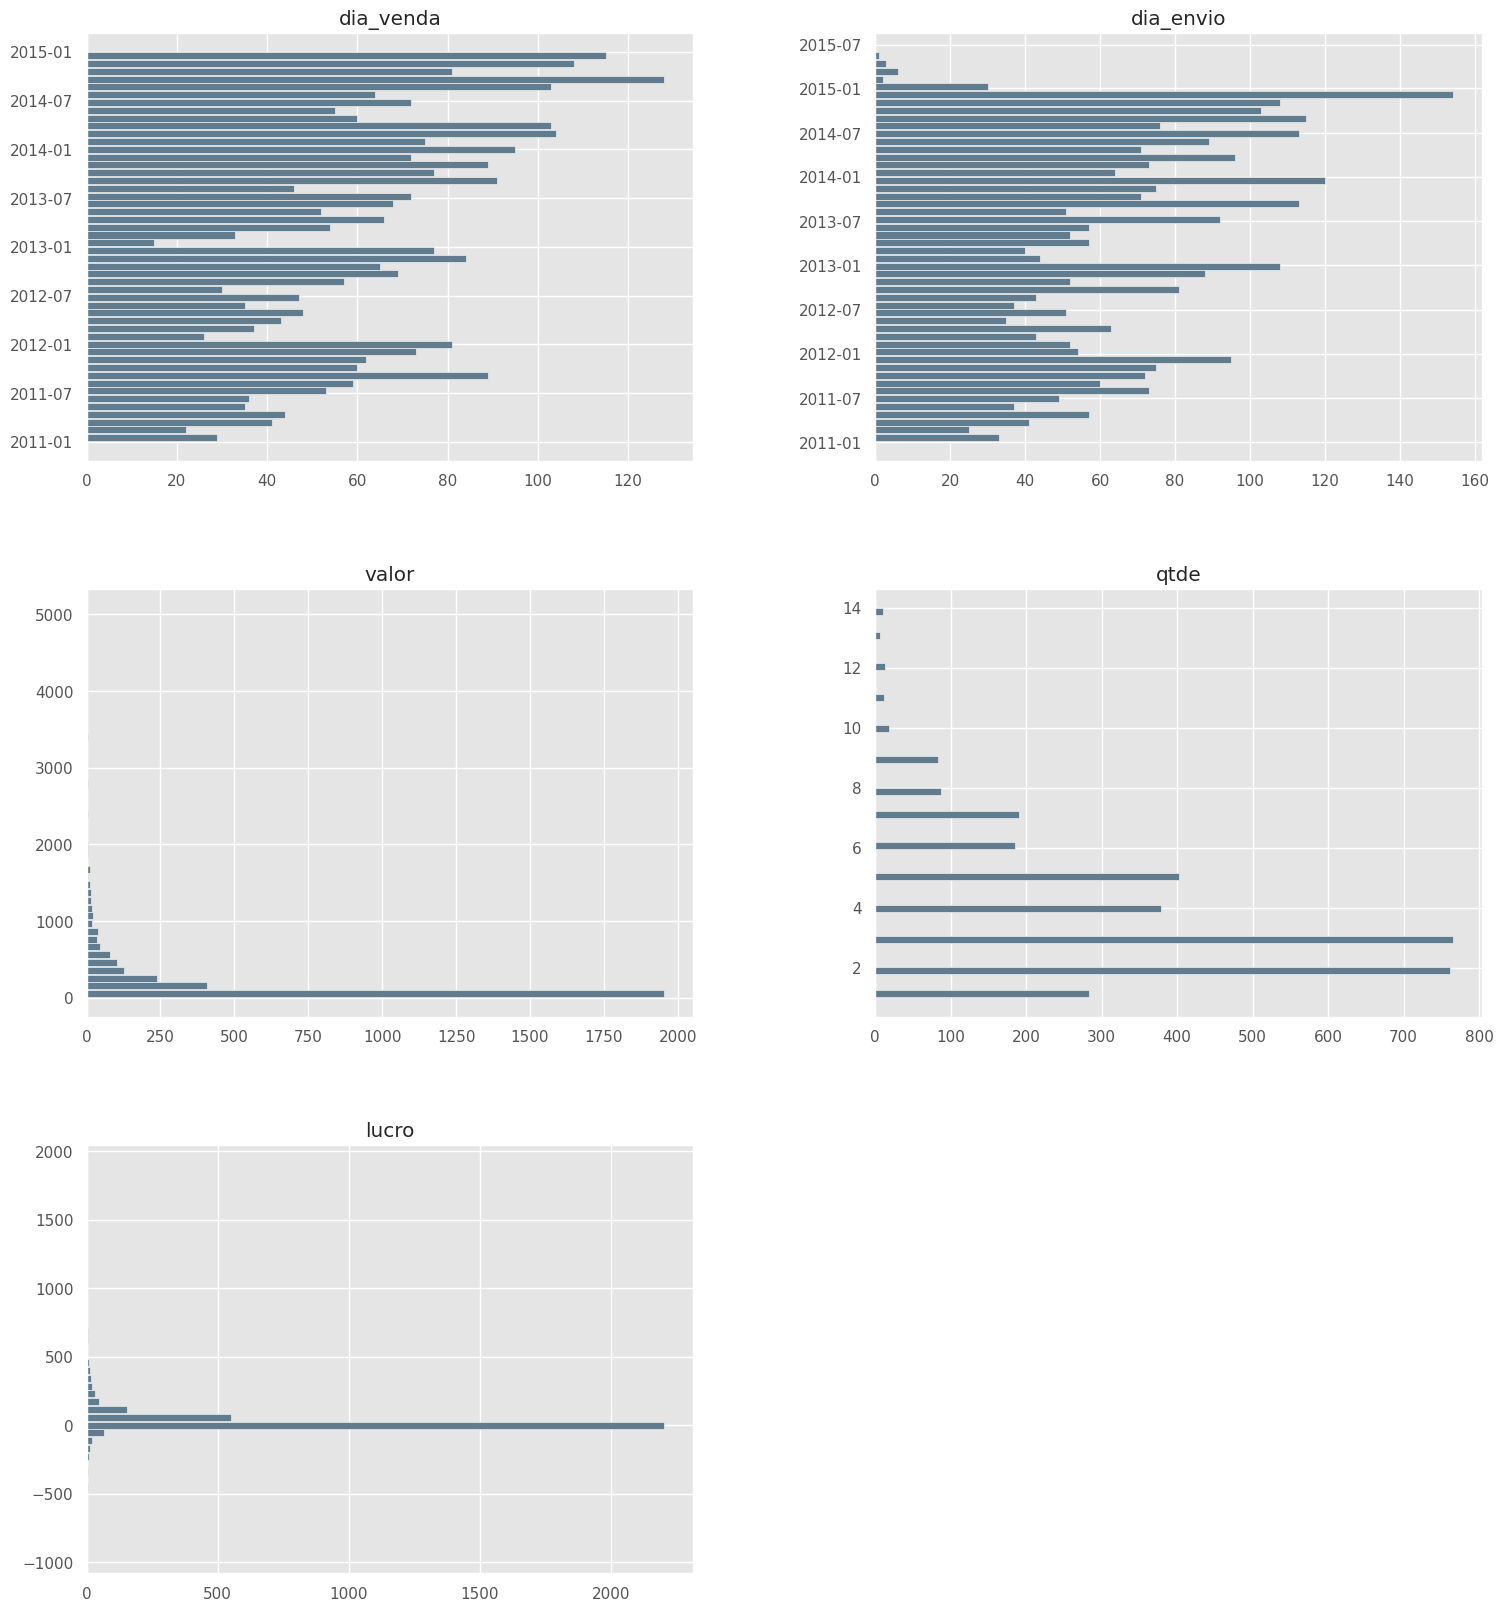

In [97]:
ax = datawal.hist(grid=True, bins=50, color='#607c8e',rwidth=0.9, figsize=(18,20),orientation='horizontal')

plt.show()



numpy.ndarray

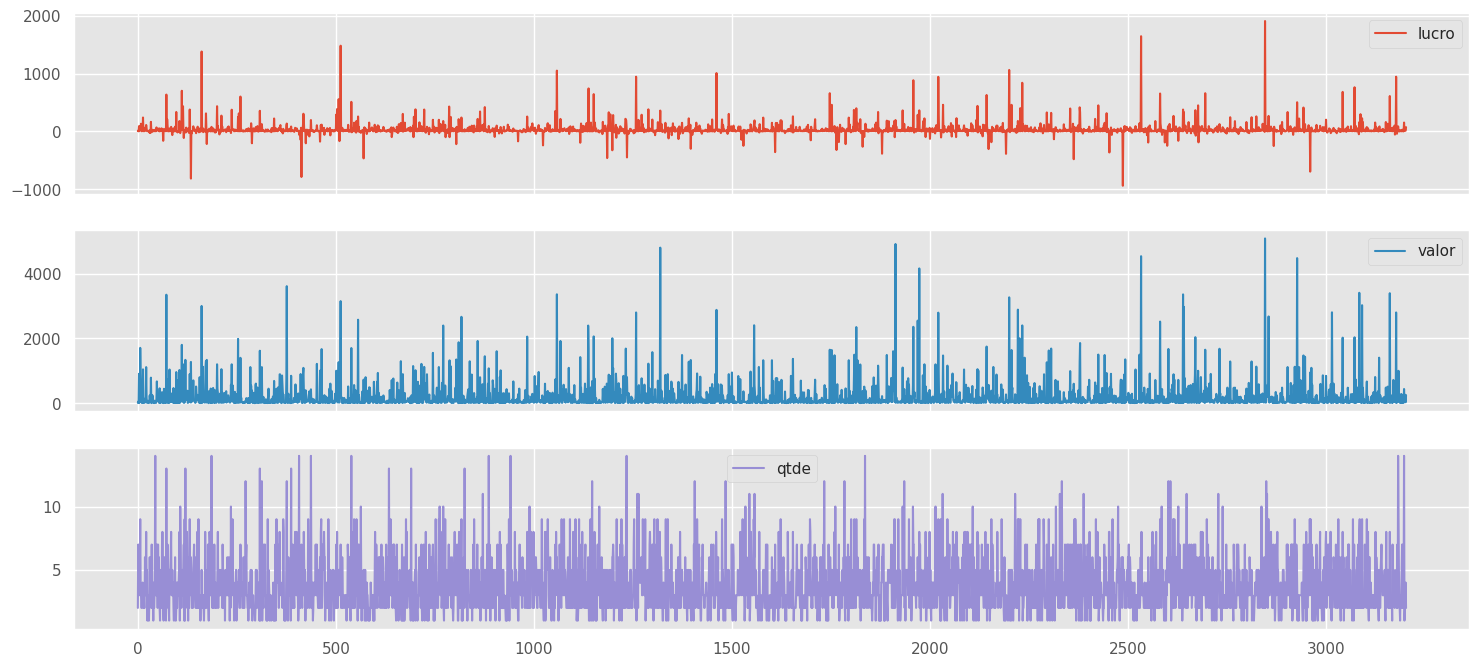

In [98]:
axes = datawal[['lucro','valor','qtde']].plot.line(subplots=True,figsize=(18,8))
type(axes)

<Axes: xlabel='dia_venda', ylabel='valor'>

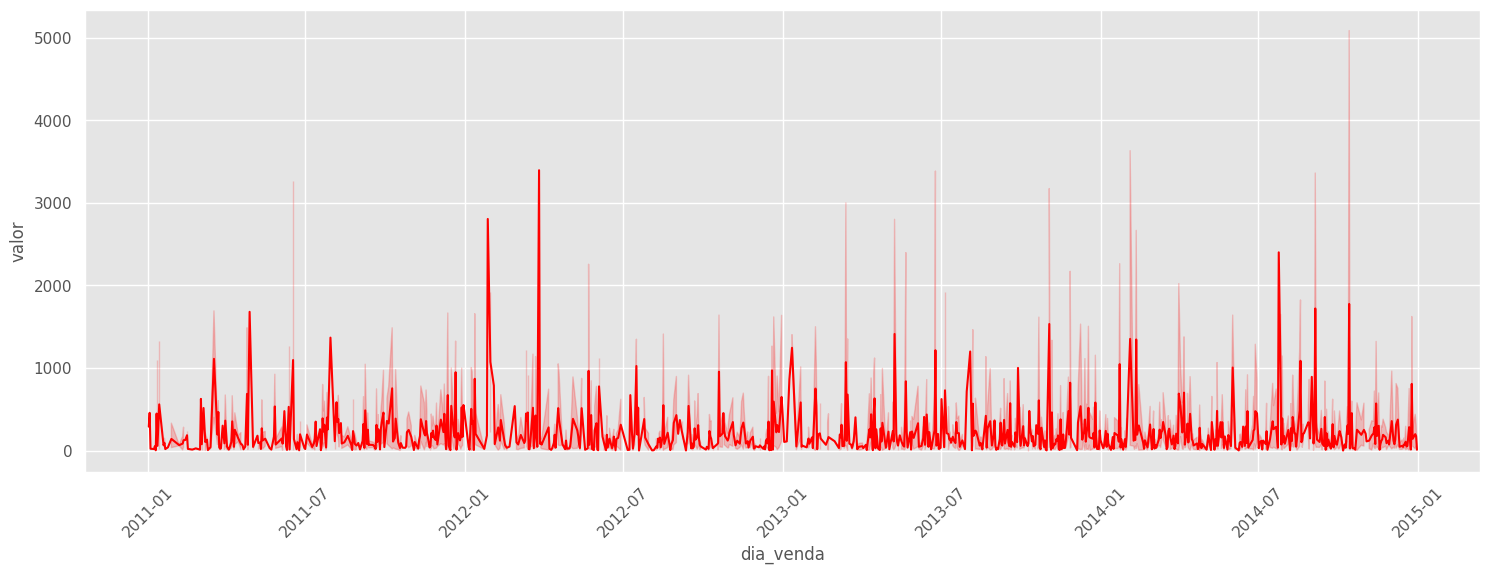

In [99]:
plt.figure(figsize=(18,6))
plt.xticks(rotation=45)
sns.set_theme(style="darkgrid")
sns.lineplot(data=datawal, x=datawal.dia_venda, y='valor', color='red')

In [100]:
datawal.head()

,Pedido,dia_venda,dia_envio,nome_cliente,país,cidade,estado,categoria,produto,valor,qtde,lucro
0,CA-2013-138688,2013-06-13,2013-06-17,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,CA-2011-115812,2011-09-06,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
2,CA-2011-115812,2011-09-06,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97
3,CA-2011-115812,2011-09-06,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72
4,CA-2011-115812,2011-09-06,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78


Vendas por categoria

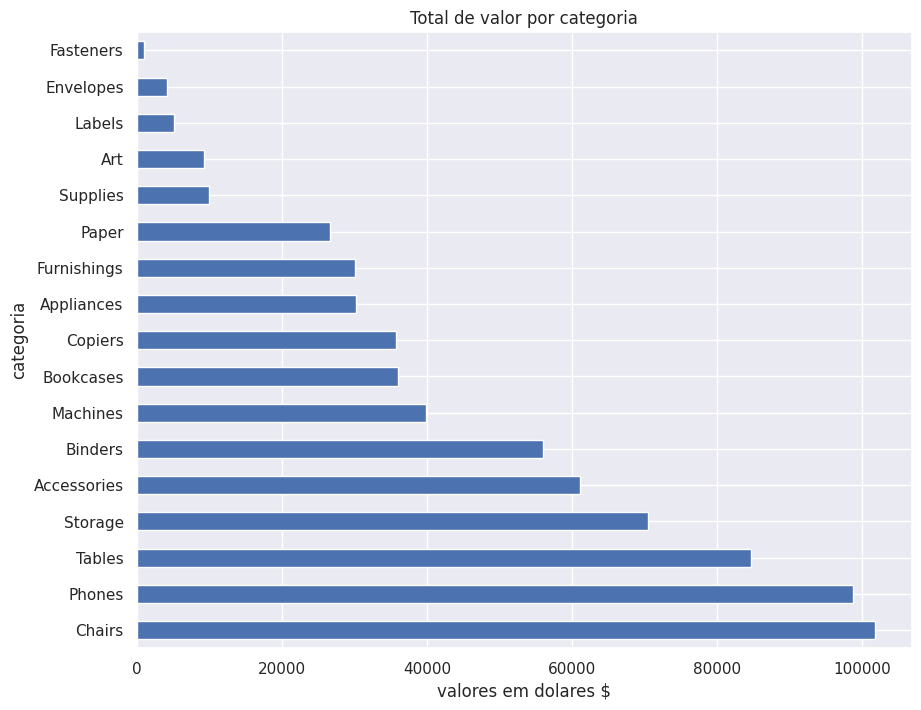

In [101]:
import matplotlib.pyplot as plt
# Group the data by category and sum the sales
categoria_vendida = datawal.groupby("categoria")["valor"].sum()
# Sort the sales by descending order and plot a bar chart
plt.figure(figsize=(10,8))# plotsize sempre o primeiro
categoria_vendida.sort_values(ascending=False).plot(kind="barh")
plt.title("Total de valor por categoria")
plt.xlabel("valores em dolares $")
plt.ylabel("categoria")
plt.show()

lucro por categoria

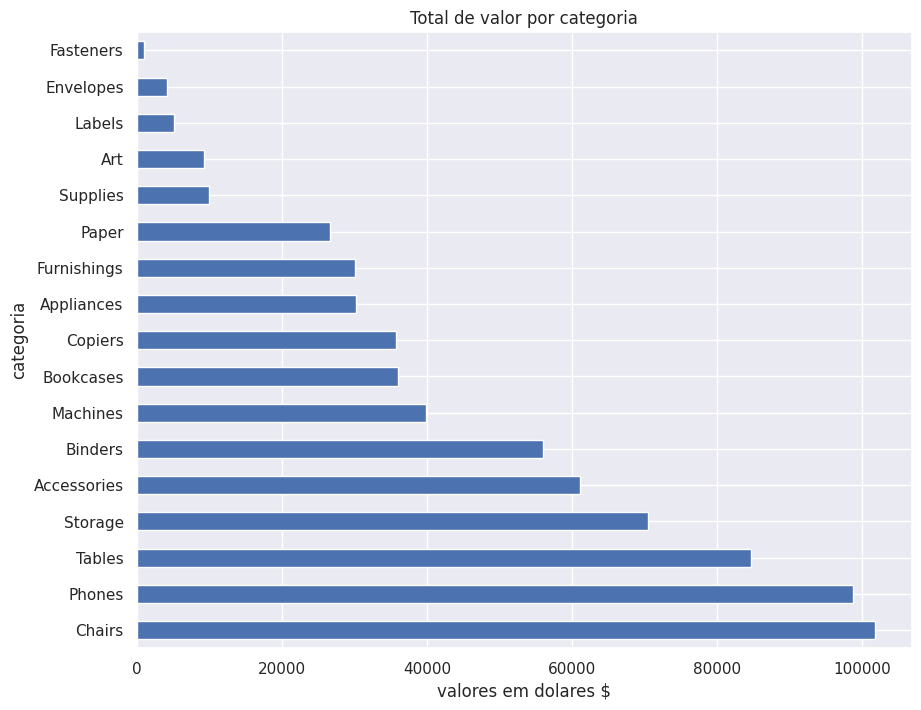

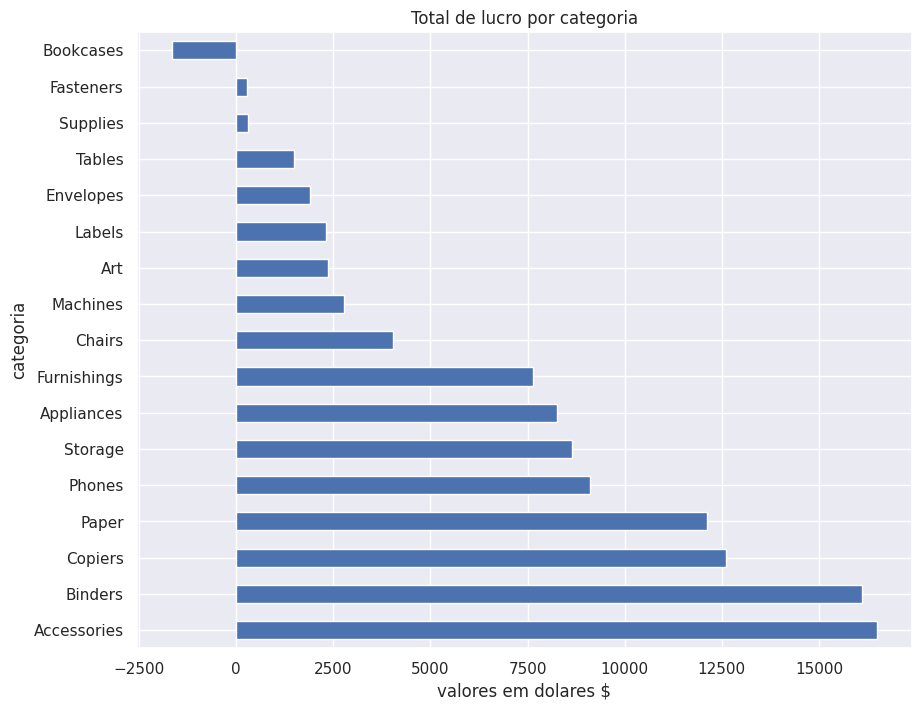

In [102]:
import matplotlib.pyplot as plt
# Group the data by category and sum the sales
categoria_vendida = datawal.groupby("categoria")["valor"].sum()
# Sort the sales by descending order and plot a bar chart
plt.figure(figsize=(10,8))# plotsize sempre o primeiro
categoria_vendida.sort_values(ascending=False).plot(kind="barh")
plt.title("Total de valor por categoria")
plt.xlabel("valores em dolares $")
plt.ylabel("categoria")


# Group the data by category and sum the sales
categoria_vendida = datawal.groupby("categoria")["lucro"].sum()
# Sort the sales by descending order and plot a bar chart
plt.figure(figsize=(10,8))# plotsize sempre o primeiro
categoria_vendida.sort_values(ascending=False).plot(kind="barh")
plt.title("Total de lucro por categoria")
plt.xlabel("valores em dolares $")
plt.ylabel("categoria")
plt.show()

a categoria Bookcases deu prejuízo , vamos retirá-la do estudo e fazer um estudo de seu comportamento aparte , pois ela inviabiliza visualizações.

In [109]:
df_remove = datawal.loc[(datawal['categoria'] == 'Bookcases') ]

#df_remove = df_final.loc[(df_final['Diametrofio1'] < .71)

In [110]:
datawal= datawal.drop(df_remove.index)

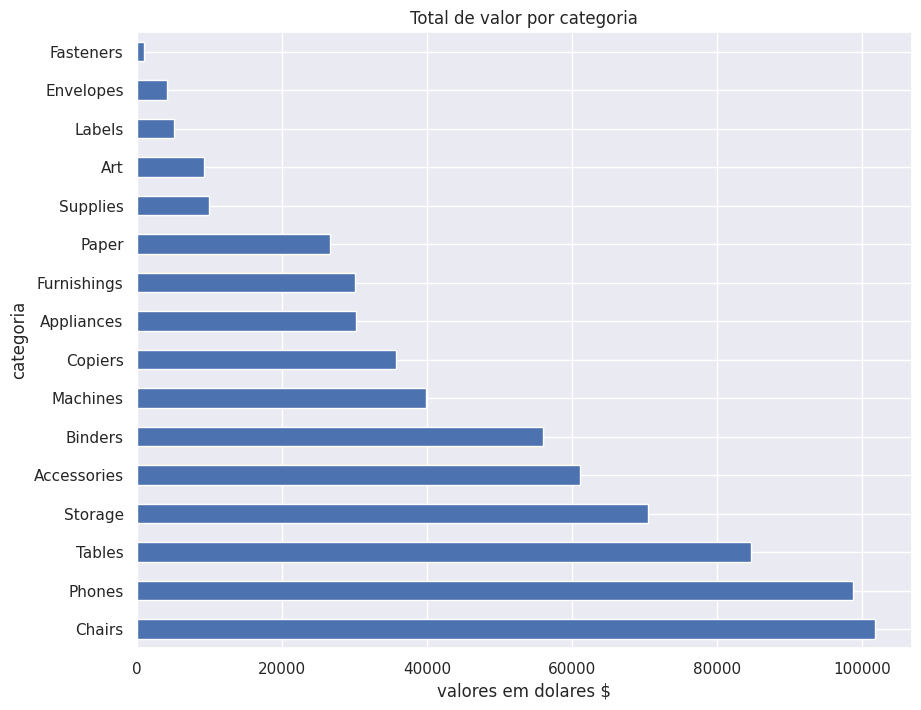

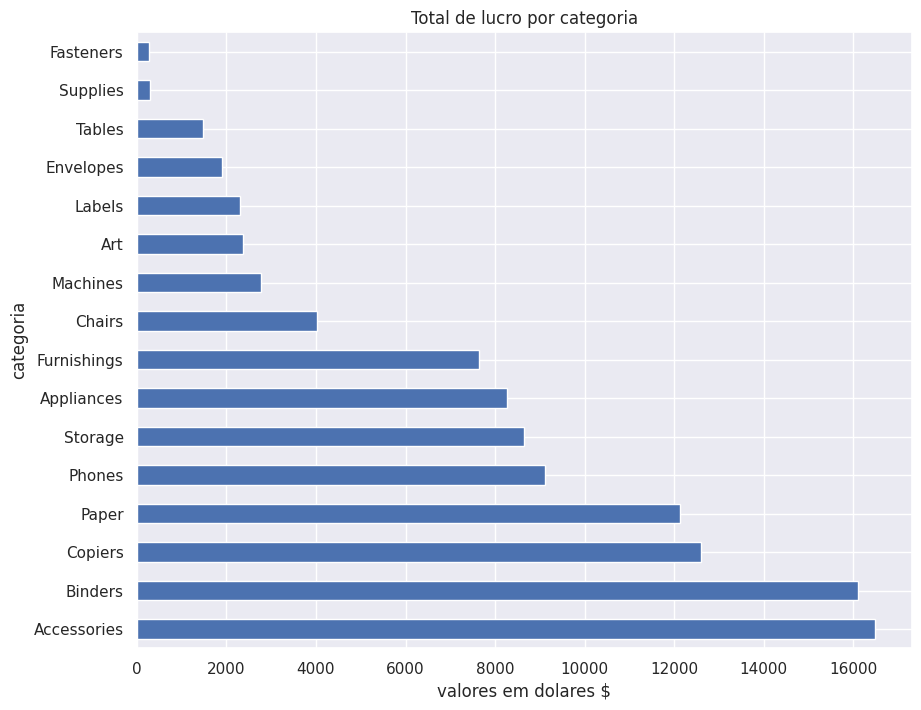

In [113]:
categoria_vendida = datawal.groupby("categoria")["valor"].sum()
# Sort the sales by descending order and plot a bar chart
plt.figure(figsize=(10,8))# plotsize sempre o primeiro
categoria_vendida.sort_values(ascending=False).plot(kind="barh")
plt.title("Total de valor por categoria")
plt.xlabel("valores em dolares $")
plt.ylabel("categoria")
plt.show()
# Group the data by category and sum the sales
categoria_vendida = datawal.groupby("categoria")["lucro"].sum()
# Sort the sales by descending order and plot a bar chart
plt.figure(figsize=(10,8))# plotsize sempre o primeiro
categoria_vendida.sort_values(ascending=False).plot(kind="barh")
plt.title("Total de lucro por categoria")
plt.xlabel("valores em dolares $")
plt.ylabel("categoria")
plt.show()

In [114]:
datawal

,Pedido,dia_venda,dia_envio,nome_cliente,país,cidade,estado,categoria,produto,valor,qtde,lucro
0,CA-2013-138688,2013-06-13,2013-06-17,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,CA-2011-115812,2011-09-06,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
2,CA-2011-115812,2011-09-06,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97
3,CA-2011-115812,2011-09-06,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72
4,CA-2011-115812,2011-09-06,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78
...,...,...,...,...,...,...,...,...,...,...,...,...
3198,CA-2013-125794,2013-09-30,2013-04-10,Maris LaWare,United States,Los Angeles,California,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.24,1.0,15.22
3199,CA-2014-121258,2014-02-27,2014-04-03,Dave Brooks,United States,Costa Mesa,California,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.96,2.0,15.63
3200,CA-2014-121258,2014-02-27,2014-04-03,Dave Brooks,United States,Costa Mesa,California,Phones,Aastra 57i VoIP phone,258.58,2.0,19.39
3201,CA-2014-121258,2014-02-27,2014-04-03,Dave Brooks,United States,Costa Mesa,California,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.60,4.0,13.32


In [115]:
dataOrig=datawal

vendas quantidade por categoria

biblioteca rolling  pandas media móvel

O uso de média móvel tem como objetivo dar uma visualização das vendas menos fragmentada

In [116]:
datawal['media_valor'] = datawal['valor'].rolling(window = 30).mean()

<Axes: xlabel='dia_venda', ylabel='media_valor'>

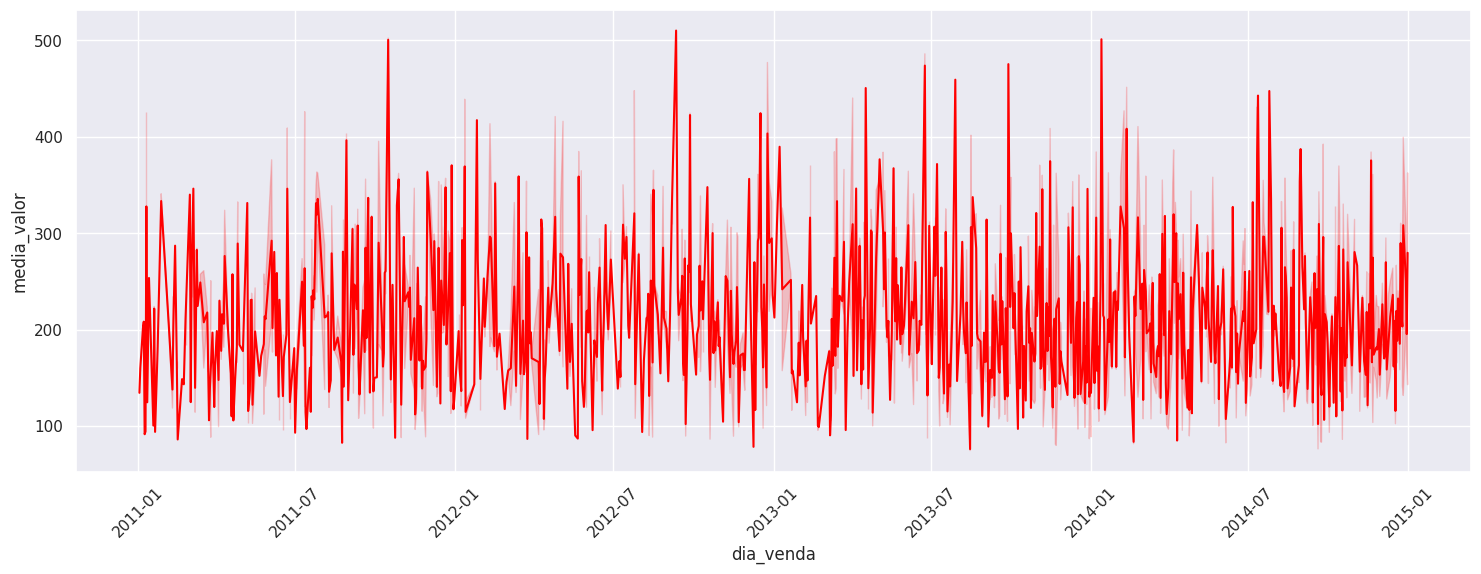

In [117]:
plt.figure(figsize=(18,6))
plt.xticks(rotation=45)
sns.set_theme(style="darkgrid")
sns.lineplot(data=datawal, x=datawal.dia_venda, y='media_valor', color='red')

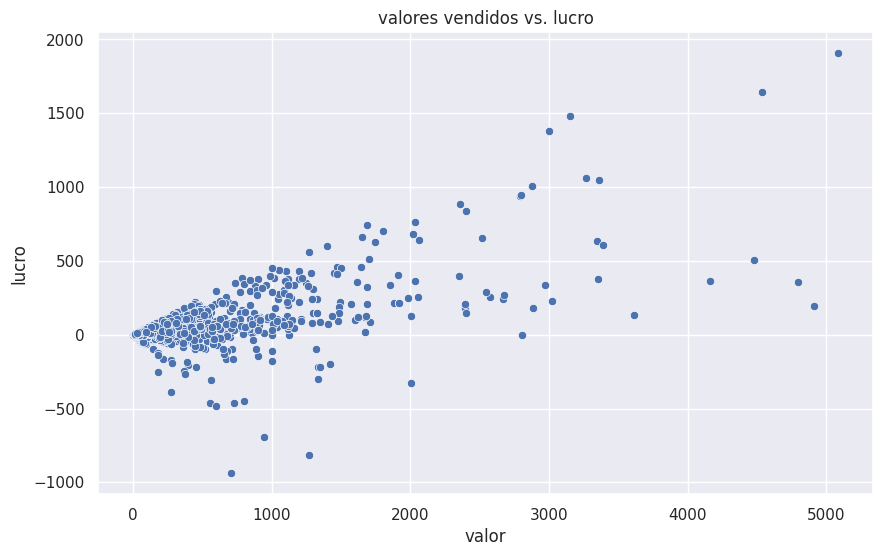

In [118]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="valor", y="lucro", data= datawal)
plt.title('valores vendidos vs. lucro')
plt.ylabel('lucro')
plt.xlabel('valor')
plt.show()

# Construção de modelos de ML
#Segmentação de clientes



fazendo um backup do dataset até aqui

In [119]:
backup=datawal.copy(deep=True)

In [120]:
datawal = backup

Importação das bibliotecas necessárias para o K-Means Clustering*

In [121]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

##usar o label encoder para transformar as variáveis categóricas em numéricas

In [122]:
# encode categorical variables
le = LabelEncoder()
datawal["país"] = le.fit_transform(datawal["país"])
datawal["cidade"] = le.fit_transform(datawal["cidade"])
datawal["estado"] = le.fit_transform(datawal["estado"])
#datawal["categoria"] = le.fit_transform(datawal["categoria"])
datawal["produto"] = le.fit_transform(datawal["produto"])



##StandardScaler executa a tarefa de padronização.
Normalmente, um conjunto de dados contém variáveis ​​que são diferentes em escala, ela constrói uma normalização

Esses parametros estão em escalas diferentes e serão agora padronizadas

In [123]:
# scale numerical features
scaler = StandardScaler()
X = datawal[["valor", "qtde", "lucro"]] = scaler.fit_transform(datawal[["valor", "qtde", "lucro"]])

In [124]:
X =datawal[["valor", "qtde", "lucro"]]
X

,valor,qtde,lucro
0,-0.452939,-0.810003,-0.245174
1,-0.374783,1.405293,-0.179466
2,-0.469694,0.076115,-0.289279
3,1.584363,0.076115,0.509567
4,-0.444083,-0.366944,-0.254985
...,...,...,...
3198,-0.403589,-1.253062,-0.170015
3199,-0.276402,-0.810003,-0.166324
3200,0.103927,-0.810003,-0.132480
3201,-0.418746,0.076115,-0.187117


@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

## Otimizando o K: o melhor k do K means, usando o método Elbow

In [125]:
import seaborn as sns
def calculate_wcss(data):
    wcss = []
    for n in range(2, 21):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)

    return wcss

In [126]:
X.head()

,valor,qtde,lucro
0,-0.452939,-0.810003,-0.245174
1,-0.374783,1.405293,-0.179466
2,-0.469694,0.076115,-0.289279
3,1.584363,0.076115,0.509567
4,-0.444083,-0.366944,-0.254985


wcss = Within-Cluster Sum of Square

soma dos quadrados intra-clusters (ou do inglês within-clusters sum-of-squares, comumente abreviado para wcss) seja a menor possível, sendo zero o resultado ótimo.

In [127]:
wcss = calculate_wcss(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [128]:
wcss

[5994.754346599511,
 4043.1289406632204,
 3199.243490088498,
 2737.9088286954056,
 2381.9235807224504,
 2117.3911222730785,
 1828.4724915487775,
 1636.8870815562627,
 1465.3851043964341,
 1363.4333442841007,
 1267.2515970378342,
 1184.8792811138035,
 1127.0857588990043,
 1066.576542867251,
 1001.4103231480676,
 958.1659510229624,
 921.1329303602128,
 854.4602945550896,
 827.4680421463297]

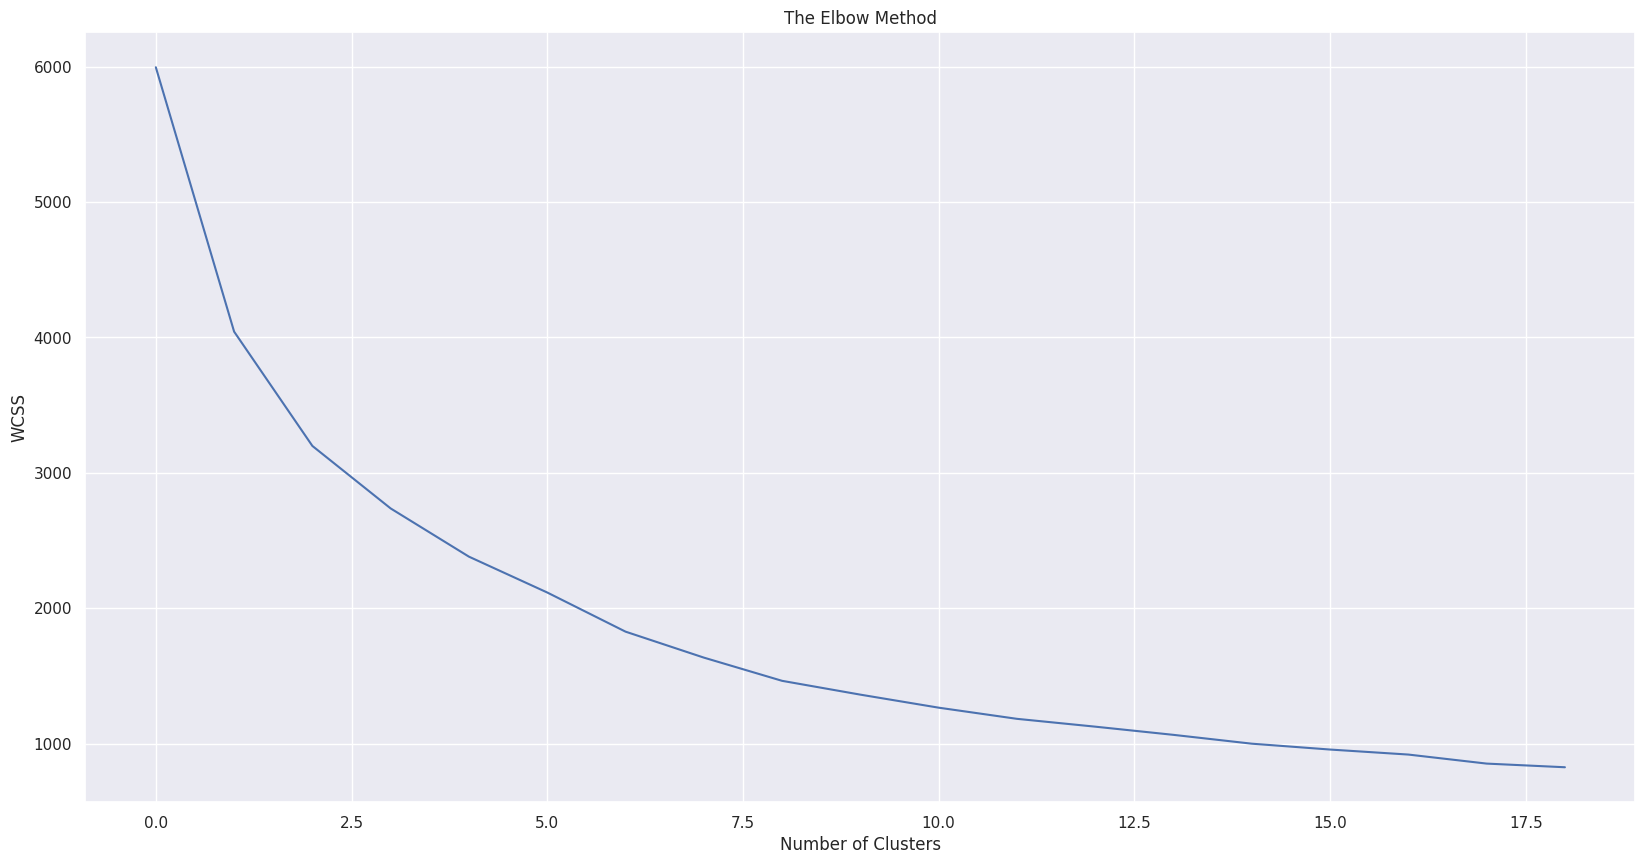

In [129]:
plt.figure(figsize=(20, 10));
plt.plot(range(19), wcss);
plt.title('The Elbow Method');
plt.xlabel('Number of Clusters');
plt.ylabel('WCSS');
plt.show()

Achando a melhor quantidade de wcss  numero de K

In [130]:
from math import sqrt
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)

    return distances.index(max(distances)) + 2

In [131]:
optimal_number_of_clusters(wcss)

6

##*Running* o K-means


apesar de termos o melhor k =6, vvamos utilizar o valor de k = 4

In [177]:
# perform K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
datawal["Cluster"] = kmeans.fit_predict(datawal[["valor", "qtde", "lucro"]])
# y = datawal[["valor", "qtde", "lucro"]]
# y= kmeans.fit_predict(y)
# # perform K-Means clustering
# kmeans = KMeans(n_clusters=4, random_state=42)
# sales_data["Cluster"] = kmeans.fit_predict(sales_data[["Sales", "Quantity", "Profit"]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


na saída ja acrescento os clusters no dataset

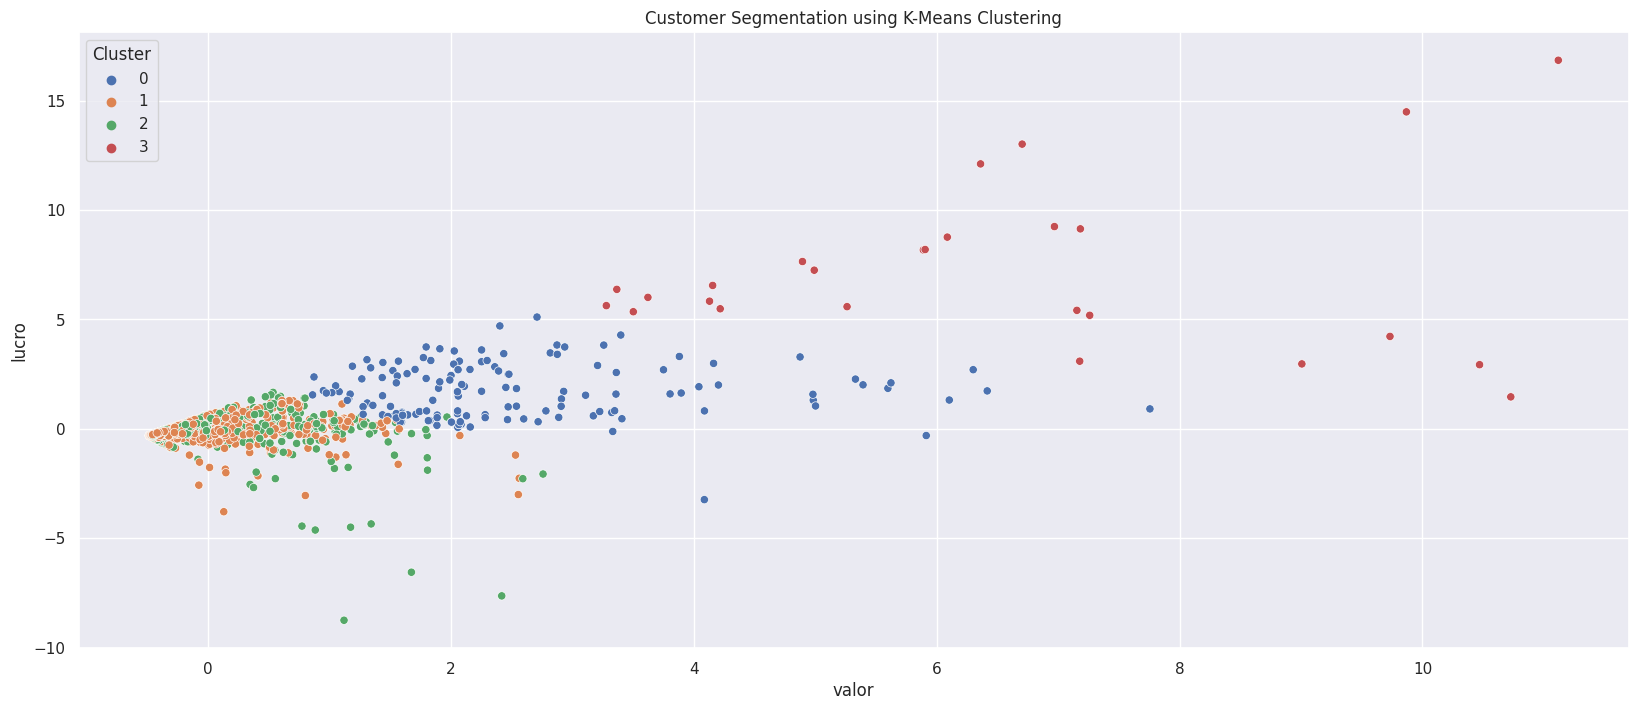

In [178]:
# visualize the clusters
plt.figure(figsize=(20,8))
sns.scatterplot(data=datawal, x="valor", y="lucro", hue="Cluster",palette="deep")
plt.title("Customer Segmentation using K-Means Clustering")
plt.show()


In [179]:
X

,valor,qtde,lucro
0,-0.452939,-0.810003,-0.245174
1,-0.374783,1.405293,-0.179466
2,-0.469694,0.076115,-0.289279
3,1.584363,0.076115,0.509567
4,-0.444083,-0.366944,-0.254985
...,...,...,...
3198,-0.403589,-1.253062,-0.170015
3199,-0.276402,-0.810003,-0.166324
3200,0.103927,-0.810003,-0.132480
3201,-0.418746,0.076115,-0.187117


In [180]:
datawal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3120 entries, 0 to 3202
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Pedido        3120 non-null   object        
 1   dia_venda     3120 non-null   datetime64[ns]
 2   dia_envio     3120 non-null   datetime64[ns]
 3   nome_cliente  3120 non-null   object        
 4   país          3120 non-null   int64         
 5   cidade        3120 non-null   int64         
 6   estado        3120 non-null   int64         
 7   categoria     3120 non-null   object        
 8   produto       3120 non-null   int64         
 9   valor         3120 non-null   float64       
 10  qtde          3120 non-null   float64       
 11  lucro         3120 non-null   float64       
 12  media_valor   3091 non-null   float64       
 13  Cluster       3120 non-null   int32         
dtypes: datetime64[ns](2), float64(4), int32(1), int64(4), object(3)
memory usage: 418.0+ KB


@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


# Análise

In [136]:
dataOrig['categoria'].unique()

array(['Labels', 'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances',
       'Tables', 'Storage', 'Accessories', 'Paper', 'Chairs', 'Fasteners',
       'Supplies', 'Envelopes', 'Copiers', 'Machines'], dtype=object)

In [137]:
data_analise = dataOrig[['lucro','valor','categoria']]
data_analise


,lucro,valor,categoria
0,6.87,14.62,Labels
1,14.17,48.86,Furnishings
2,1.97,7.28,Art
3,90.72,907.15,Phones
4,5.78,18.50,Binders
...,...,...,...
3198,15.22,36.24,Accessories
3199,15.63,91.96,Furnishings
3200,19.39,258.58,Phones
3201,13.32,29.60,Paper


In [138]:
df2 = datawal['Cluster']
df2.head()

0    1
1    2
2    1
3    0
4    1
Name: Cluster, dtype: int32

In [139]:
dataAnalise = pd.merge(data_analise, df2, left_index=True, right_index=True)

In [140]:
dataAnalise

,lucro,valor,categoria,Cluster
0,6.87,14.62,Labels,1
1,14.17,48.86,Furnishings,2
2,1.97,7.28,Art,1
3,90.72,907.15,Phones,0
4,5.78,18.50,Binders,1
...,...,...,...,...
3198,15.22,36.24,Accessories,1
3199,15.63,91.96,Furnishings,1
3200,19.39,258.58,Phones,1
3201,13.32,29.60,Paper,1


lucros e valores de venda por grupos

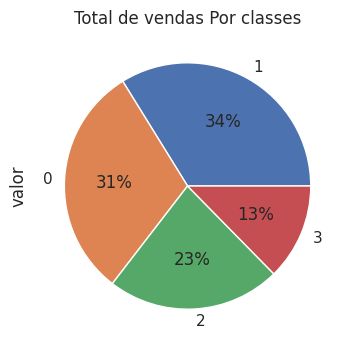

In [187]:

venda_classe = dataAnalise.groupby("Cluster")["valor"].sum()
plt.figure(figsize=(6,4) )
# Sort the sales by descending order and plot a pie chart
venda_classe.sort_values(ascending=False).plot( kind='pie', y='votes_of_eacAnaliseh_class', autopct='%1.0f%%')
plt.title("Total de vendas Por classes")
plt.show()


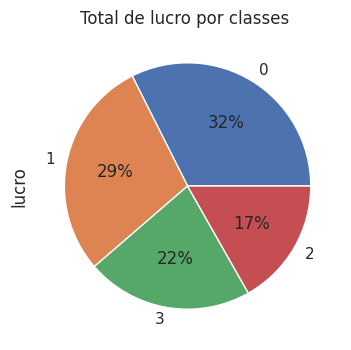

In [186]:
Lucro_classe = dataAnalise.groupby("Cluster")["lucro"].sum()
plt.figure(figsize=(6,4) )
# Sort the sales by descending order and plot a pie chart
Lucro_classe.sort_values(ascending=False).plot( kind='pie', y='votes_of_each_class', autopct='%1.0f%%')
plt.title("Total de lucro por classes ")
#plt.ylabel("")
plt.show()

**Analise**

Gráfico das classes

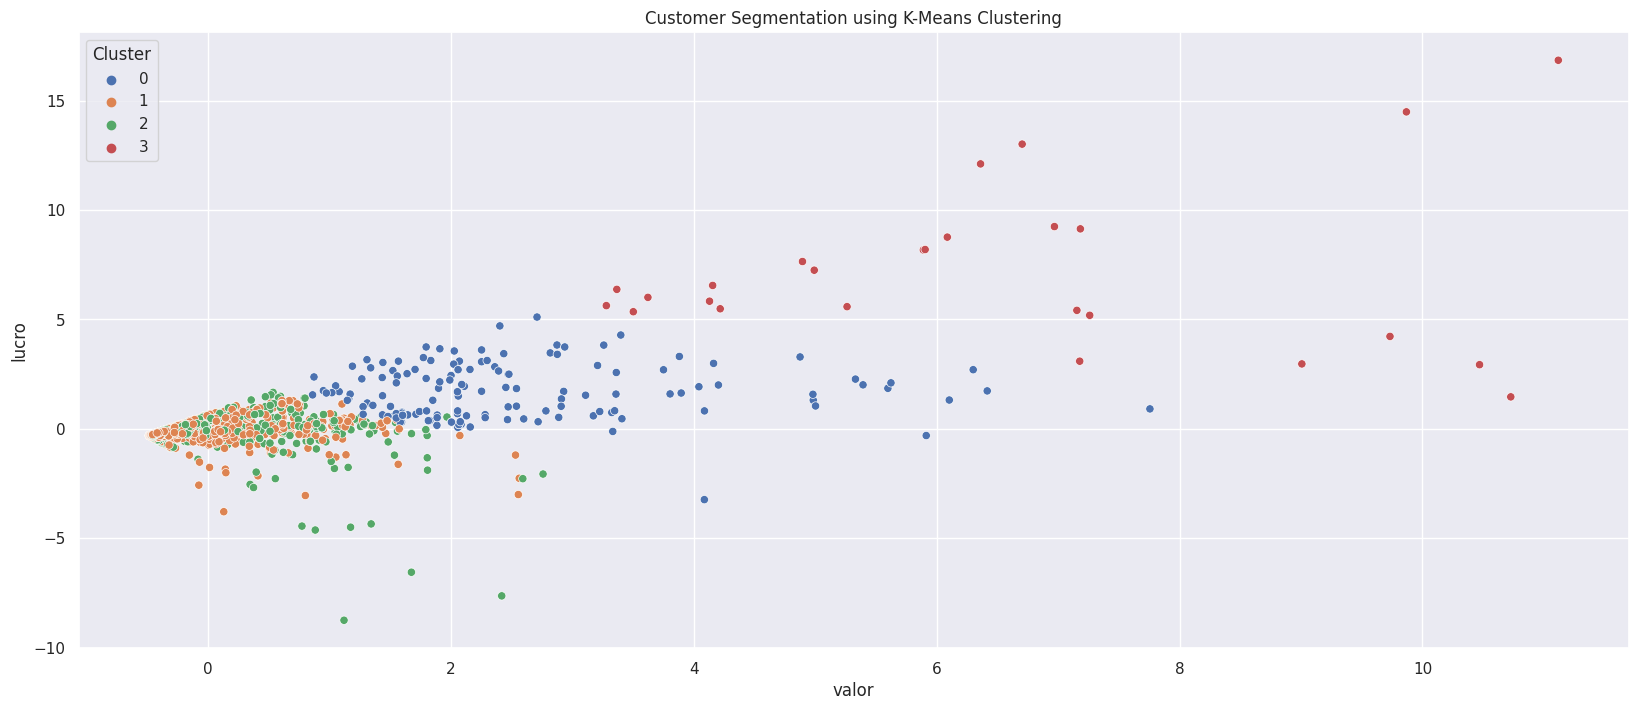

In [188]:
# visulização repetida para consulta
plt.figure(figsize=(20,8))
sns.scatterplot(data=datawal, x="valor", y="lucro", hue="Cluster",palette="deep")
plt.title("Customer Segmentation using K-Means Clustering")
plt.show()

##Classe 0

A classe 0  tem um valor médio de compra relativamente alto com ticket médio de $1,301 dólares.

É composto por clientes que compram principalmente cadeiras, mesas, telefones, estorjos e materiais de escritório, como fichários e acessórios de mesa.

 Esses clientes provavelmente são empresas ou organizações que exigem um mix de suprimentos básicos de escritório, estão em expansão ou entrando no mercado.

A classe 0 gerou um lucro médio de \$219 dólares e um lucro de \$34,498.90 por ítem de venda.

O faturamento total da classe foi de \$204,288.69 dólares.

In [143]:
data_anal0 = dataAnalise[dataAnalise['Cluster'] == 0]

In [144]:
data_anal0.head()

,lucro,valor,categoria,Cluster
3,90.72,907.15,Phones,0
6,85.31,1706.18,Tables,0
7,68.36,911.42,Phones,0
13,240.26,1044.63,Tables,0
21,111.30,1113.02,Art,0


In [145]:
data_anal0['categoria'].value_counts()

Chairs         29
Tables         25
Phones         22
Storage        20
Accessories    16
Copiers        10
Machines       10
Appliances      9
Binders         9
Furnishings     3
Labels          2
Art             1
Paper           1
Name: categoria, dtype: int64

In [146]:
data_anal0.describe()

,lucro,valor,Cluster
count,157.000000,157.000000,157.0
mean,219.738217,1301.201847,0.0
std,134.002158,551.265368,0.0
min,-325.570000,590.350000,0.0
25%,108.180000,911.980000,0.0
50%,210.590000,1123.130000,0.0
75%,314.270000,1487.980000,0.0
max,601.970000,3610.850000,0.0


In [147]:
data_anal0['valor'].sum()

204288.69

In [148]:
data_anal0['lucro'].sum()

34498.9

Gráfico 1 com a soma das vendas por categoria, e gráfico 2 com a soma dos lucros por categoria

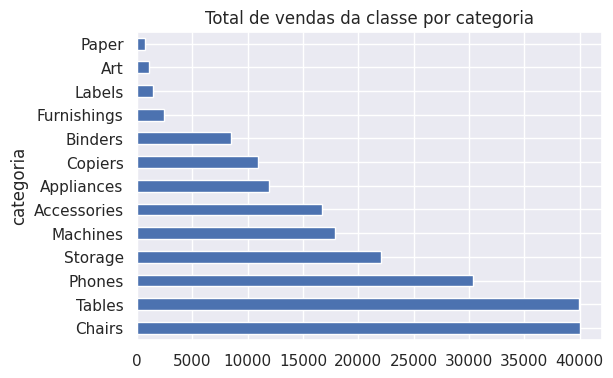

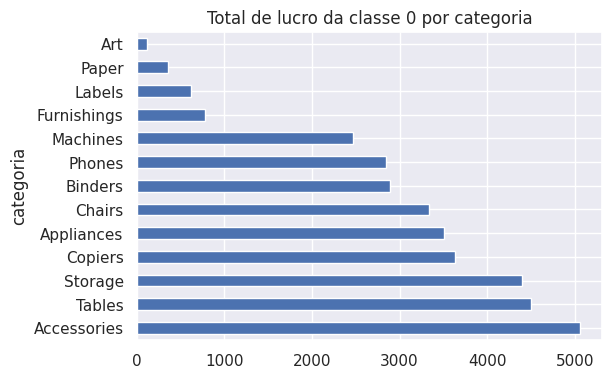

In [191]:

venda_grupo = data_anal0.groupby("categoria")["valor"].sum()
plt.figure(figsize=(6,4) )
# Sort the sales by descending order and plot a pie chart
#venda_grupo.sort_values(ascending=False).plot( kind='pie', y='votes_of_each_class', autopct='%1.0f%%')
venda_grupo.sort_values(ascending=False).plot(kind="barh")
plt.title("Total de vendas da classe por categoria")

venda_grupo = data_anal0.groupby("categoria")["lucro"].sum()
plt.figure(figsize=(6,4) )
# Sort the sales by descending order and plot a pie chart
#venda_grupo.sort_values(ascending=False).plot( kind='pie', y='votes_of_each_class', autopct='%1.0f%%')
venda_grupo.sort_values(ascending=False).plot(kind="barh")
plt.title("Total de lucro da classe 0 por categoria")
#plt.ylabel("")
plt.show()

##Classe 1
Os lucros não podem ser plotados pelo Pie, por possuirem valores negativos.

A classe 1 tem um valor médio de compra de $109.00 dólares.

É composta por clientes que compram principalmente papelarias, adesivos, móveis, telefones, materiais para art, estojos e acessórios.

Esses clientes provavelmente são indivíduos ou pequenas empresas que precisam de suprimentos básicos de escritório para suas operações.

Geram um lucro médio de $15 dólares por ítem de venda, baixa lucratividade.

O faturamento de foi de \$224,802.34 dólares, e um lucro de \$30,782.98

In [150]:
data_anal1 = dataAnalise[dataAnalise['Cluster'] == 1]
data_anal1

,lucro,valor,categoria,Cluster
0,6.87,14.62,Labels,1
2,1.97,7.28,Art,1
4,5.78,18.50,Binders,1
8,132.59,407.98,Binders,1
9,9.99,55.50,Storage,1
...,...,...,...,...
3198,15.22,36.24,Accessories,1
3199,15.63,91.96,Furnishings,1
3200,19.39,258.58,Phones,1
3201,13.32,29.60,Paper,1


In [151]:
data_anal1['categoria'].value_counts()

Paper          306
Binders        300
Furnishings    213
Phones         181
Art            175
Storage        173
Accessories    165
Chairs         143
Appliances      97
Labels          72
Tables          68
Fasteners       48
Envelopes       47
Supplies        47
Machines        19
Copiers          6
Name: categoria, dtype: int64

In [152]:
data_anal1.describe()

,lucro,valor,Cluster
count,2060.000000,2060.000000,2060.0
mean,14.943199,109.127350,1.0
std,34.525404,162.177443,0.0
min,-386.960000,0.990000,1.0
25%,3.007500,13.487500,1.0
50%,7.990000,39.900000,1.0
75%,21.010000,129.570000,1.0
max,177.590000,1335.680000,1.0


In [153]:
data_anal1['valor'].sum()

224802.34

In [154]:
data_anal1['lucro'].sum()

30782.989999999998

Gráfico 1 com a soma das vendas por categoria, e gráfico 2 com histograma da soma dos lucros

Text(0, 0.5, '')

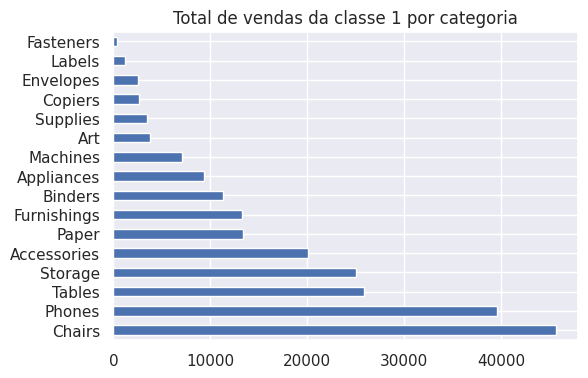

In [193]:

venda_grupo = data_anal1.groupby("categoria")["valor"].sum()
plt.figure(figsize=(6,4) )
# Sort the sales by descending order and plot a pie chart
#venda_grupo.sort_values(ascending=False).plot( kind='pie', y='votes_of_each_class', autopct='%1.0f%%')
venda_grupo.sort_values(ascending=False).plot(kind="barh")
plt.title("Total de vendas da classe 1 por categoria")
plt.ylabel("")

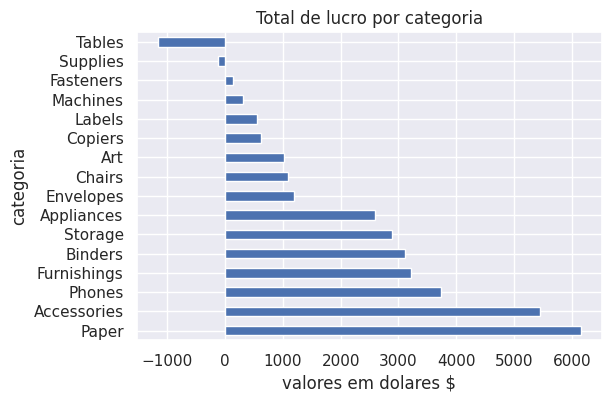

In [194]:
categoria_lucro = data_anal1.groupby("categoria")["lucro"].sum()
# Sort the sales by descending order and plot a bar chart
plt.figure(figsize=(6,4))
categoria_lucro.sort_values(ascending=False).plot(kind="barh")
plt.title("Total de lucro por categoria")
plt.xlabel("valores em dolares $")
plt.ylabel("categoria")
plt.show()

In [157]:
data_anal1.loc[(data_anal1 ['lucro'] < 0) ]

,lucro,valor,categoria,Cluster
28,-3.79,5.68,Binders,1
31,-3.84,102.36,Furnishings,1
32,-25.82,36.88,Binders,1
34,-1.83,2.39,Binders,1
36,-9.16,81.42,Chairs,1
...,...,...,...,...
3089,-3.62,4.94,Binders,1
3132,-1.78,71.09,Tables,1
3147,-12.20,195.14,Chairs,1
3174,-54.32,362.14,Chairs,1


##Classe 2
Os lucros não podem ser plotados pelo Pie, por possuirem valores negativos.


O grupo 2 tem o menor valor médio de vendas e é composto por clientes que compram principalmente pequenos materiais de escritório, como etiquetas e etiquetas de endereço autoadesivas,móveis,materias para arte acessórios.

Esses clientes provavelmente são indivíduos ou pequenas empresas que precisam de suprimentos básicos de escritório para suas operaões, clientes que compram principalmente papelarias, adesivos, móveis, telefones, materiais para art, estojos e acessórios.

A classe 2 gerou um lucro médio de \$20.41 dólares , e um valor de venda de \$173.23 por ítem vendido.
teve um faturamento de \$151,581.39 dólares e um lucro total de \$17,862.20








In [158]:
data_anal2 = dataAnalise[dataAnalise['Cluster'] == 2]
data_anal2

,lucro,valor,categoria,Cluster
1,14.17,48.86,Furnishings,2
5,34.47,114.90,Appliances,2
18,9.36,25.82,Binders,2
23,4.17,14.90,Art,2
30,-26.88,238.90,Accessories,2
...,...,...,...,...
3184,13.30,51.15,Supplies,2
3191,27.20,271.96,Phones,2
3192,5.23,18.69,Art,2
3195,0.00,13.86,Fasteners,2


In [159]:
data_anal2.describe()

,lucro,valor,Cluster
count,875.000000,875.000000,875.0
mean,20.413943,173.235874,2.0
std,75.329731,213.797274,0.0
min,-938.280000,4.160000,2.0
25%,7.055000,32.400000,2.0
50%,17.750000,82.560000,2.0
75%,39.715000,235.725000,2.0
max,219.440000,1421.660000,2.0


In [160]:
data_anal2['categoria'].value_counts()

Binders        154
Paper          143
Furnishings     88
Art             74
Accessories     73
Storage         73
Phones          73
Labels          42
Chairs          35
Appliances      29
Fasteners       24
Tables          21
Supplies        20
Envelopes       20
Machines         6
Name: categoria, dtype: int64

In [161]:
data_anal2['valor'].sum()

151581.39

In [162]:
data_anal2['lucro'].sum()

17862.200000000004

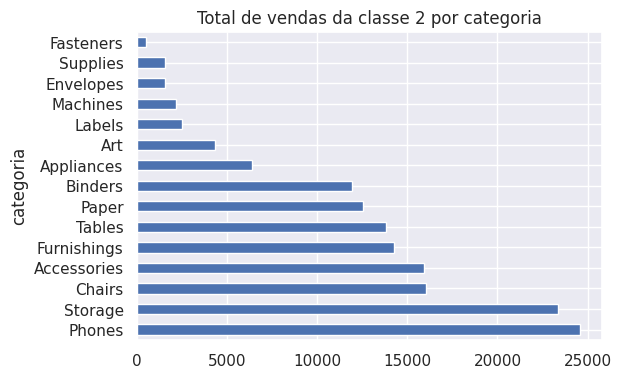

In [195]:
# Group the data by region and sum the sales
venda_grupo = data_anal2.groupby("categoria")["valor"].sum()
plt.figure(figsize=(6,4) )
# Sort the sales by descending order and plot a pie chart
#venda_grupo.sort_values(ascending=False).plot( kind='pie', y='votes_of_each_class', autopct='%1.0f%%')
venda_grupo.sort_values(ascending=False).plot(kind="barh")
plt.title("Total de vendas da classe 2 por categoria")
#plt.ylabel("")


plt.show()

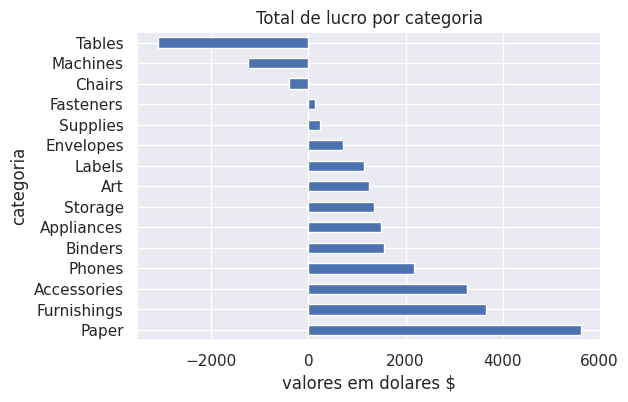

In [196]:
categoria_lucro = data_anal2.groupby("categoria")["lucro"].sum()
# Sort the sales by descending order and plot a bar chart
plt.figure(figsize=(6,4))# plotsize sempre o primeiro
categoria_lucro.sort_values(ascending=False).plot(kind="barh")
plt.title("Total de lucro por categoria")
plt.xlabel("valores em dolares $")
plt.ylabel("categoria")
plt.show()

##Classe 3



A classe 3 tem o maior valor médio de vendas e é composto por clientes que compram principalmente suprimentos , copiadores, telefones, etiquetas e adesivos em quantidade, produtos de alto valor.


Tem uma representação de lucro maior do que de vendas, o que significa ser o melhor negócio, interessante priorizar aumento de vendas nessa classe.

A classe 3 gerou uma venda média de \$3001.56 dólares por item de venda com um lucro médio de \$831.20 dólares.
Um total de vendas de \$84,043.73 e um lucro de \$23,273.69


In [165]:
data_anal3 = dataAnalise[dataAnalise['Cluster'] == 3]
data_anal3

,lucro,valor,categoria,Cluster
72,636.00,3347.37,Accessories,3
111,701.99,1799.97,Copiers,3
161,1379.98,2999.95,Copiers,3
512,1480.47,3149.93,Copiers,3
1058,1049.99,3359.95,Copiers,3
1138,742.63,1687.80,Accessories,3
1151,643.98,2060.74,Binders,3
1258,944.99,2799.96,Copiers,3
1319,360.00,4799.98,Machines,3
1461,1007.98,2879.95,Copiers,3


In [166]:
data_anal3.describe()

,lucro,valor,Cluster
count,28.000000,28.000000,28.0
mean,831.203214,3001.561786,3.0
std,393.152840,1054.816737,0.0
min,196.500000,1649.950000,3.0
25%,634.252500,2053.950000,3.0
50%,722.310000,2839.955000,3.0
75%,960.737500,3368.382500,3.0
max,1906.490000,5083.960000,3.0


In [167]:
data_anal3['valor'].sum()

84043.73

In [168]:
data_anal3['lucro'].sum()

23273.690000000002

In [169]:
data_anal3['categoria'].value_counts()

Copiers        8
Binders        8
Accessories    4
Machines       3
Tables         2
Supplies       1
Phones         1
Appliances     1
Name: categoria, dtype: int64

Gráfico 1 com a soma das vendas por categoria, e gráfico 2 com a soma dos lucros por categoria

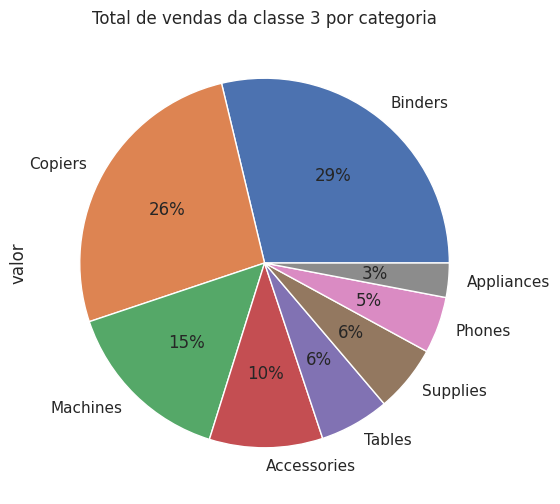

In [201]:
# Group the data by region and sum the sales
venda_grupo = data_anal3.groupby("categoria")["valor"].sum()
plt.figure(figsize=(8,6) )
# Sort the sales by descending order and plot a pie chart
venda_grupo.sort_values(ascending=False).plot( kind='pie', y='votes_of_each_class', autopct='%1.0f%%')
plt.title("Total de vendas da classe 3 por categoria")
#plt.ylabel("")
plt.show()


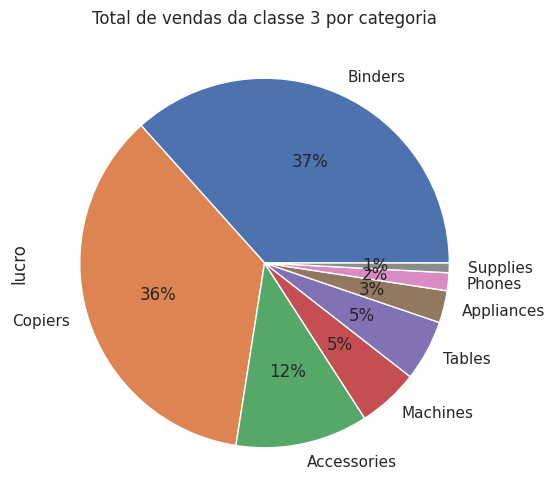

In [200]:
# Group the data by region and sum the sales
venda_grupo = data_anal3.groupby("categoria")["lucro"].sum()
plt.figure(figsize=(8,6) )
# Sort the sales by descending order and plot a pie chart
venda_grupo.sort_values(ascending=False).plot( kind='pie', y='', autopct='%1.0f%%')
plt.title("Total de vendas da classe 3 por categoria")
#plt.ylabel("")
plt.show()

In [171]:
vendas_mes = datawal.groupby(datawal['dia_venda'].dt.month)['valor'].sum()

Visualização das vendas atuais

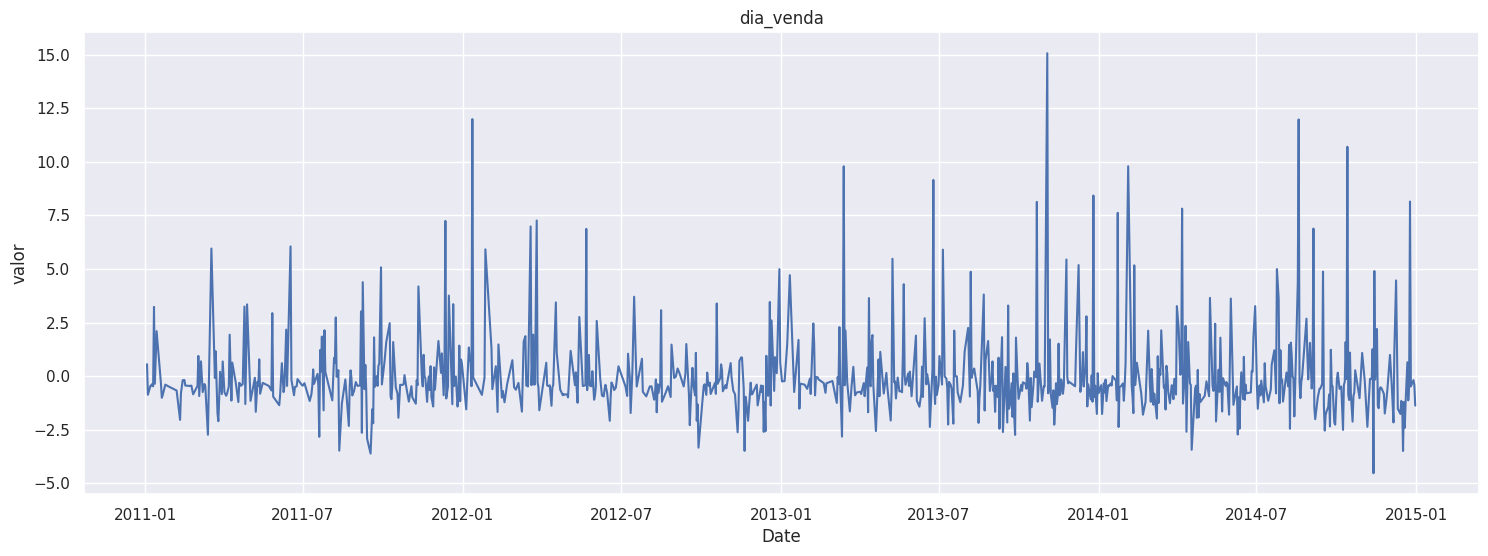

In [172]:
# Group the sales data by Order Date and sum up the Sales column for each day
daily_sales = backup.groupby('dia_venda')['valor'].sum()

# Create a new dataframe with the daily sales time-series data
daily_sales_df = pd.DataFrame({'dia_venda': 'valor'.index, 'valor': daily_sales.values})

# Set the Order Date column as the index of the dataframe
daily_sales_df.set_index('dia_venda', inplace=True)

# Create a time-series plot of the daily sales data
plt.figure(figsize=(18,6))
plt.plot(daily_sales)
plt.title('dia_venda')
plt.xlabel('Date')
plt.ylabel('valor')
plt.show()

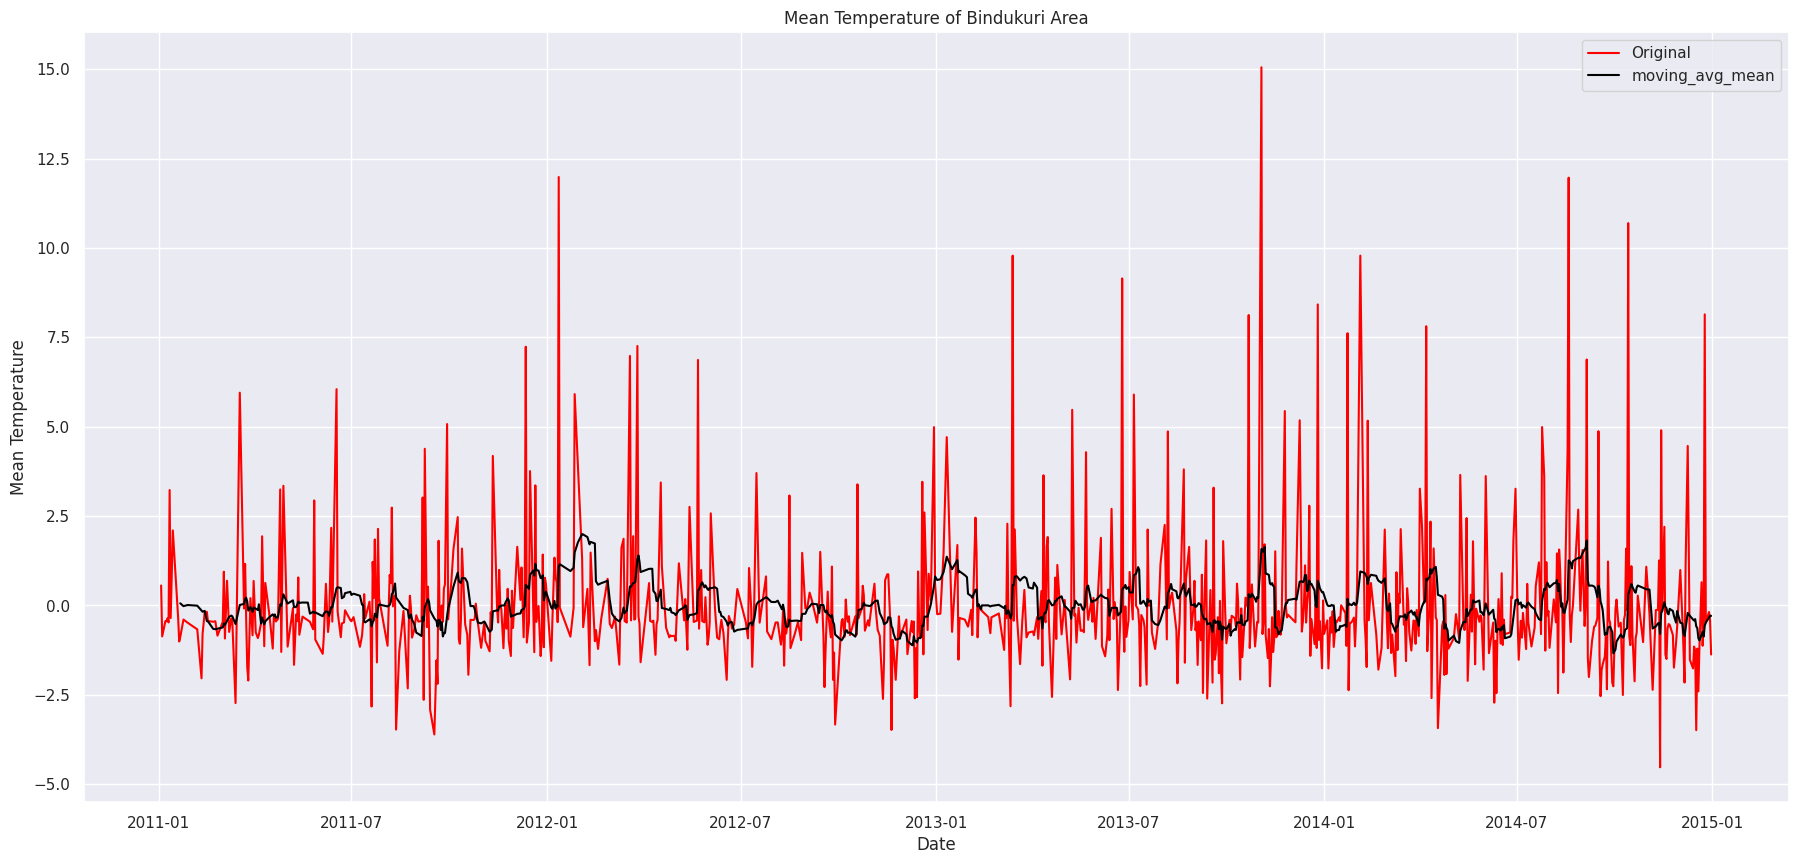

In [173]:
# metodo da média móvel
window_size = 6
moving_avg = daily_sales.rolling(12).mean()
plt.figure(figsize=(22,10))
plt.plot(daily_sales, color = "red",label = "Original")
plt.plot(moving_avg, color='black', label = "moving_avg_mean")
plt.title("Mean Temperature of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()

# Modelo de série temporal
Previsão de vendas

In [174]:
# Loading Necessary Library
from prophet import Prophet

# Prpreparando o dataseet para time-series forecasting
df = backup.groupby('dia_venda')['valor'].sum().reset_index()
df = df.rename(columns={'dia_venda': 'ds', 'valor': 'y'})

# Create and train the model
model = Prophet()
model.fit(df)


# Make future sales predictions
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr8eu8r_8/pzp97kam.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr8eu8r_8/hfpu8oz6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56540', 'data', 'file=/tmp/tmpr8eu8r_8/pzp97kam.json', 'init=/tmp/tmpr8eu8r_8/hfpu8oz6.json', 'output', 'file=/tmp/tmpr8eu8r_8/prophet_modelep0haujy/prophet_model-20230614164140.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:41:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:41:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [175]:
df.head()

,ds,y
0,2011-01-03,0.558145
1,2011-01-04,-0.866047
2,2011-01-07,-0.440842
3,2011-01-08,-0.441230
4,2011-01-09,-0.363187


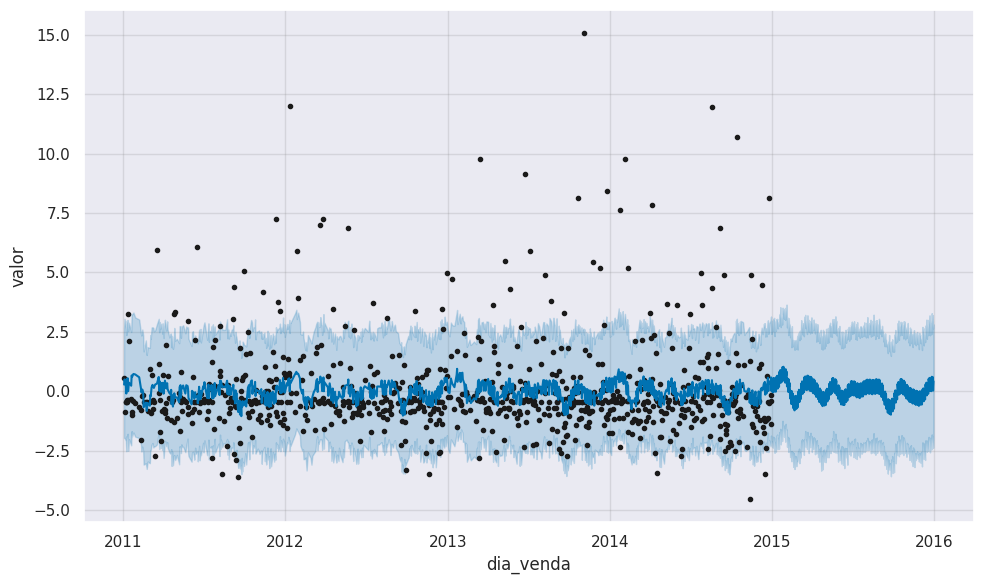

In [176]:
# Plot the forecast
fig = model.plot(forecast, xlabel='dia_venda', ylabel=Com base na análise de previsão de série temporal, podemos ver que as vendas para o conjunto de dados fornecido geralmente aumentaram ao longo do tempo com algumas flutuações sazonais. O modelo de previsão prevê uma tendência ascendente contínua nas vendas para o próximo ano, com um pico de vendas em meados de 2014.

Os valores de vendas previstos podem ser usados ​​para planejar a demanda futura e otimizar os níveis de estoque. Além disso, o modelo de previsão pode ser ajustado e aprimorado ao longo do tempo à medida que mais dados se tornam disponíveis, permitindo previsões mais precisas e melhor gerenciamento da cadeia de suprimentos.'valor')


Com base na análise de previsão de série temporal, podemos ver que as vendas para o conjunto de dados fornecido geralmente aumentaram ao longo do tempo com algumas flutuações sazonais. O modelo de previsão prevê uma tendência ascendente contínua nas vendas para o próximo ano, com um pico de vendas em meados de 2014.

Os valores de vendas previstos podem ser usados ​​para planejar a demanda futura e otimizar os níveis de estoque. Além disso, o modelo de previsão pode ser ajustado e aprimorado ao longo do tempo à medida que mais dados se tornam disponíveis, permitindo previsões mais precisas e melhor gerenciamento da cadeia de suprimentos.